In [1]:
%matplotlib inline
import numpy as np
import pynbody as pb
import os


# This script requires the 'poliastro' package
# which can be installed with 'pip install poliastro'
from poliastro.bodies import Sun
from poliastro.twobody import Orbit
from astropy import units as u

simT = u.def_unit('simT', represents=(u.year/(2*np.pi)))
simV = u.AU / simT

In [2]:
filename = "ic.bin"

# Sun
m1 = 1 * u.M_sun

# Jupiter
m2 = u.M_jup.to(u.M_sun) * u.M_sun
a2 = 5.2 * u.AU
ecc2 = 1e-10 * u.one
inc2 = 1 * u.deg
raan2 = 0 * u.deg
argp2 = 0 * u.deg
nu2 = 0 * u.deg

o2 = Orbit.from_classical(Sun, a2, ecc2, inc2, raan2, argp2, nu2)

# Test particle in 2:1 MMR
m3 = 1e-50 * u.M_sun
p = 1.001
q = 1
a3 =  (p/(p+q))**(2/3)*a2
ecc3 = 1e-1 * u.one
inc3 = 1 * u.deg
raan3 = 0 * u.deg
argp3 = 0 * u.deg
nu3 = 0 * u.deg

o3 = Orbit.from_classical(Sun, a3, ecc3, inc3, raan3, argp3, nu3)

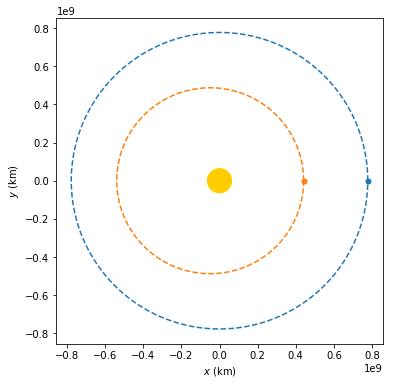

In [7]:
from poliastro.plotting.static import StaticOrbitPlotter

op = StaticOrbitPlotter()
op.plot(o2)
op.plot(o3)

In [8]:
r2 = o2.r
v2 = o2.v
r3 = o3.r
v3 = o3.v

m_tot = m1 + m2 + m3
r_com = (r2*m2 + r3*m3)/m_tot
v_com = (v2*m2 + v3*m3)/m_tot

# Convert to barycentric coordinates
r1 = -r_com
v1 = -v_com
r2 -= r_com
v2 -= v_com
r3 -= r_com
v3 -= v_com

In [9]:
tdyn3 = np.sqrt(a3**3/m1)
print("Recommended timestep: " + str(tdyn3.value*0.02))

Recommended timestep: 0.11863750370266933


In [10]:
# Convert to simulation units
e = 1e-10

ntotal = 3
ndim = 3
time = 0
masses = np.array([m1.value, m2.value, m3.value])
positions = np.array([r1.to(u.AU).value, r2.to(u.AU).value, r3.to(u.AU).value])
velocities = np.array([v1.to(simV).value, v2.to(simV).value, v3.to(simV).value])
eps = np.array([e, e, e])

In [11]:
pot = np.zeros(ntotal)
for idx in range(ntotal):
    e = 0.0
    for idx1 in range(ntotal):
        if idx == idx1:
            continue
        r = np.sqrt(np.sum((positions[idx] - positions[idx1])**2))
        e += -masses[idx1]/r
    pot[idx] = e

In [12]:
f = open('ic.txt', 'w')

f.write(str(ntotal) + ', 0, 0\n')
f.write(str(ndim) + '\n')
f.write(str(time) + '\n')

for idx in range(ntotal):
    f.write(str(masses[idx]) + '\n')

for idx in range(ntotal):
    f.write(str(positions[:,0][idx]) + '\n')
for idx in range(ntotal):
    f.write(str(positions[:,1][idx]) + '\n')
for idx in range(ntotal):
    f.write(str(positions[:,2][idx]) + '\n')
    
for idx in range(ntotal):
    f.write(str(velocities[:,0][idx]) + '\n')
for idx in range(ntotal):
    f.write(str(velocities[:,1][idx]) + '\n')
for idx in range(ntotal):
    f.write(str(velocities[:,2][idx]) + '\n')
    
for idx in range(ntotal):
    f.write(str(eps[idx]) + '\n')
    
for idx in range(ntotal):
    f.write(str(pot[idx]) + '\n')

f.close()

In [13]:
os.system("$HOME/tipsy_tools/ascii2bin < ic.txt > " + filename)
os.system("rm ic.txt")

0